# PCA

El Análisis de Componentes Principales (PCA) es una técnica estadística utilizada para reducir la dimensionalidad de un conjunto de datos, preservando la mayor cantidad de variabilidad posible. Matemáticamente, PCA transforma un conjunto de variables posiblemente correlacionadas en un conjunto de variables linealmente no correlacionadas llamadas componentes principales.

A continuación, se presenta un ejemplo detallado de cómo realizar PCA desde un enfoque matemático.

Supuestos del Ejemplo
Supongamos que tenemos un conjunto de datos con dos variables para simplificar el ejemplo:

Variable X: Representa alguna medida cuantitativa (por ejemplo, altura).
Variable Y: Representa otra medida cuantitativa (por ejemplo, peso).

In [1]:
import logging
import pandas as pd
import os
from azure.storage.blob import BlobServiceClient
from io import BytesIO

# Configuración de logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def get_azure_blob_client(connection_string, container_name):
    """Crea y devuelve un cliente de Azure Blob Storage"""
    try:
        blob_service_client = BlobServiceClient.from_connection_string(connection_string)
        container_client = blob_service_client.get_container_client(container_name)
        return container_client
    except Exception as e:
        logging.error(f"Error creando cliente de Azure Blob Storage: {e}")
        raise

def read_csv_from_blob(container_client, blob_name):
    """Lee un archivo CSV desde Azure Blob Storage y lo devuelve como DataFrame"""
    try:
        blob_client = container_client.get_blob_client(blob_name)
        stream = blob_client.download_blob()
        data = BytesIO(stream.readall())
        return pd.read_csv(data, encoding='utf-8')
    except Exception as e:
        logging.error(f"Error leyendo {blob_name} desde Azure Blob: {e}")
        return pd.DataFrame()

def main():
    # Configuración de Azure Blob Storage
    AZURE_CONNECTION_STRING = "your_azure_storage_connection_string"
    CONTAINER_NAME = "your_container_name"
    BLOB_NAME = "IA_Client_Segment_MODIFICADO.csv"  # Ajusta la extensión si es diferente
    
    try:
        # Conectar a Azure Blob Storage
        logging.info("Conectando a Azure Blob Storage...")
        container_client = get_azure_blob_client(AZURE_CONNECTION_STRING, CONTAINER_NAME)
        
        # Leer el archivo directamente a DataFrame
        logging.info(f"Leyendo {BLOB_NAME} desde Azure Blob Storage...")
        df = read_csv_from_blob(container_client, BLOB_NAME)
        
        if df.empty:
            logging.warning("El DataFrame está vacío. Verifica el archivo en Azure Blob Storage.")
            return
        
        logging.info(f"Datos cargados correctamente. Dimensiones: {df.shape}")
        logging.info("\nPrimeras 5 filas:")
        logging.info(df.head().to_string())
        
        # Aquí puedes procesar el DataFrame como necesites
        # Por ejemplo, guardarlo localmente:
        output_path = "IA_Client_Segment_MODIFICADO_local.csv"
        df.to_csv(output_path, index=False, encoding='utf-8')
        logging.info(f"DataFrame guardado localmente en: {output_path}")
        
    except Exception as e:
        logging.error(f"Error en el proceso principal: {e}")
    finally:
        logging.info("Proceso completado")

if __name__ == "__main__":
    main()

ModuleNotFoundError: No module named 'azure'

# CASO TIROIDES
La estandarización es un paso crucial en el Análisis de Componentes Principales (PCA). Consiste en transformar las variables originales para que tengan una media de 0 y una desviación estándar de 1. Esto es importante porque PCA es sensible a las escalas de las variables; variables con escalas mayores dominarán la formación de las componentes principales si no se estandarizan.

La estandarización asegura que todas las variables contribuyan de manera equitativa al análisis de PCA, evitando que variables con escalas mayores dominen las componentes principales simplemente debido a su escala.

La varianza explicada por una componente principal indica la proporción de la variabilidad total en los datos que esa componente captura. Es una medida de cuán representativa es la componente respecto a los datos originales.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r'C:\Users\jvelareb\OneDrive - Universidad Alfonso X el Sabio\Docencia\Casos de Uso\PCA\thyroidDF.csv',delimiter=';')
print(df)

      age  on_1hyroxine  query_on_1hyroxine  on_an1i1hyroid_meds  sick  \
0      29             0                   0                    0     0   
1      28             0                   0                    0     0   
2      28             0                   0                    0     0   
3      28             0                   0                    0     0   
4      54             0                   0                    0     0   
...   ...           ...                 ...                  ...   ...   
6205   80             0                   0                    0     0   
6206   64             0                   0                    0     0   
6207   16             0                   0                    0     0   
6208   54             0                   0                    0     0   
6209   78             0                   0                    0     0   

      pregnan1  1hyroid_surgery  I131_1rea1men1  query_hypo1hyroid  \
0            0                0          


Columnas numéricas: ['age', 'on_1hyroxine', 'query_on_1hyroxine', 'on_an1i1hyroid_meds', 'sick', 'pregnan1', '1hyroid_surgery', 'I131_1rea1men1', 'query_hypo1hyroid', 'query_hyper1hyroid', 'li1hium', 'goi1re', '1umor', 'hypopi1ui1ary', 'psych', 'target_thyro', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'patient_id']

'patient_id' excluida de las variables continuas.

Variables continuas seleccionadas para PCA: ['age', 'hypopi1ui1ary', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

Datos estandarizados:
        age  hypopi1ui1ary        T3       TT4       T4U       FTI       TBG
0 -1.246131            0.0  0.499894  0.841120 -3.180013 -2.457592 -0.061952
1 -1.298241            0.0  1.193645  0.467430 -3.180013 -2.457592 -0.061952
2 -1.298241            0.0  0.400787 -0.778203 -3.180013 -2.457592 -0.061952
3 -1.298241            0.0  0.301680 -0.560217 -3.180013 -2.457592 -0.061952
4  0.056598            0.0  0.896323  0.996824 -3.180013 -2.457592 -0.061952
PC1: 31.23%
PC2: 18.50%


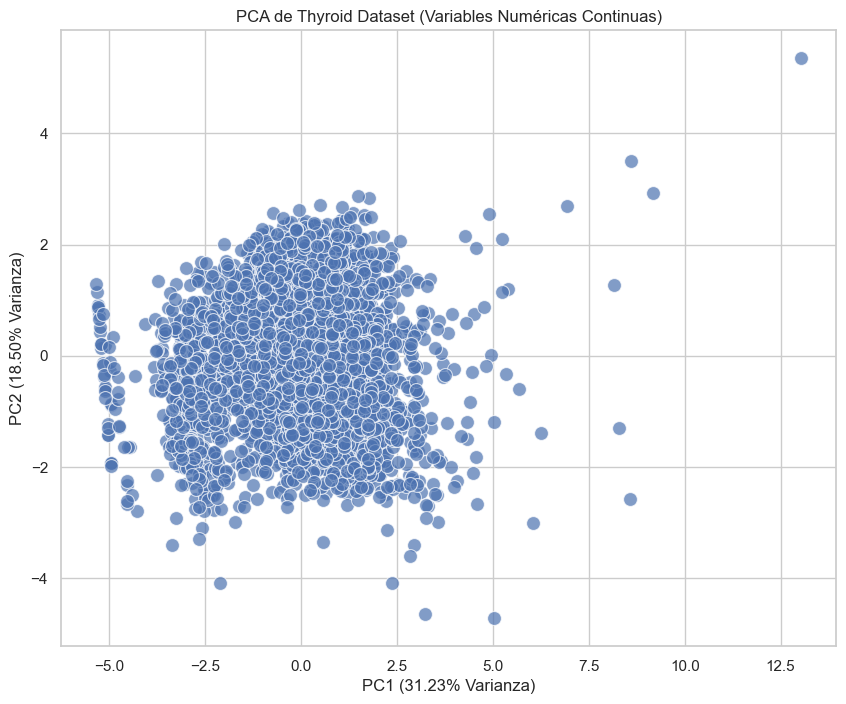

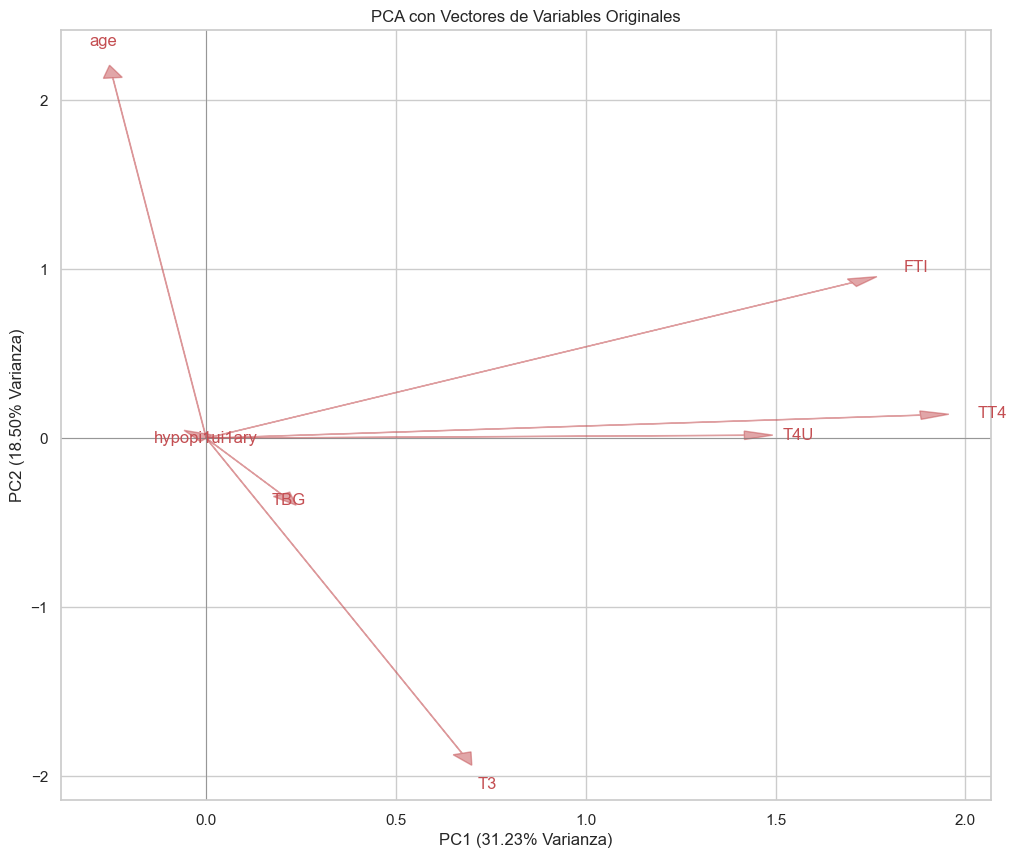


Cargas de las variables en las componentes principales:
                        PC1           PC2
age           -8.207457e-02  7.108570e-01
hypopi1ui1ary -2.775558e-16  2.220446e-16
T3             2.246924e-01 -6.214653e-01
TT4            6.272799e-01  4.554097e-02
T4U            4.726076e-01  5.836922e-03
FTI            5.670667e-01  3.067922e-01
TBG            6.613891e-02 -1.106058e-01


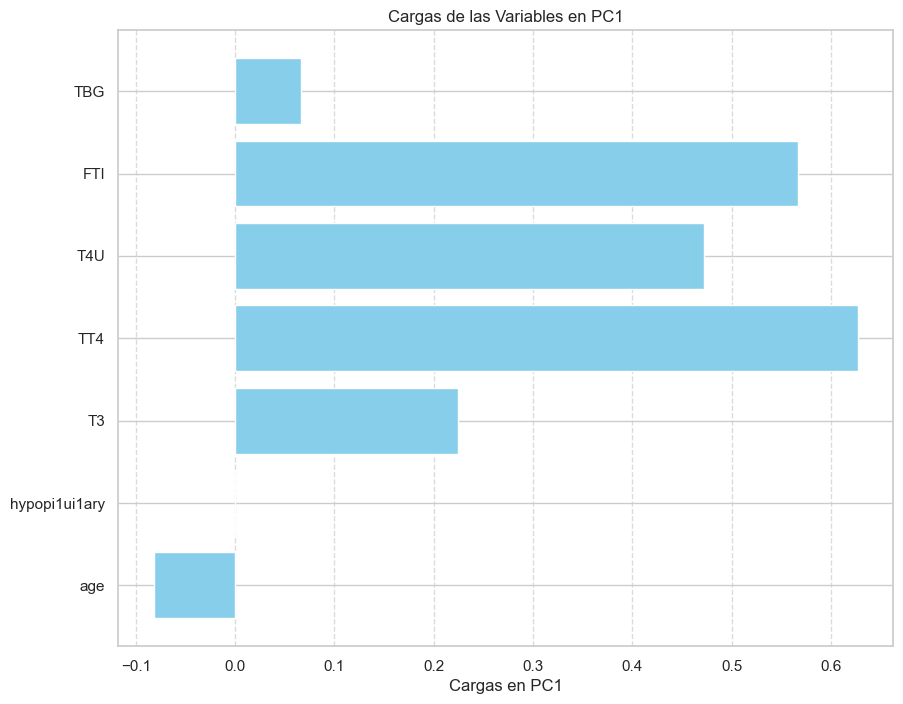

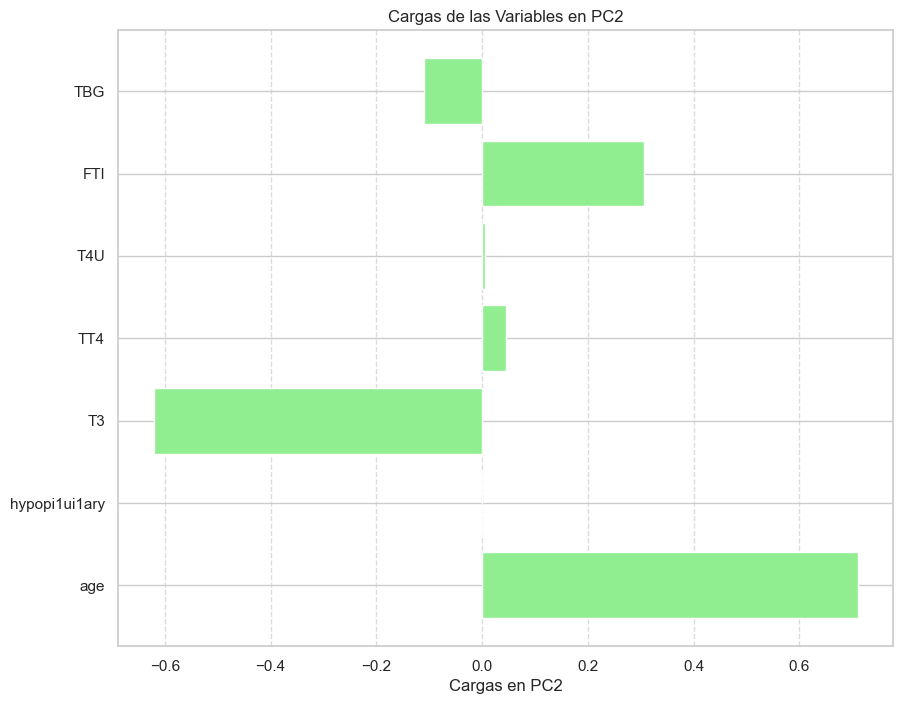

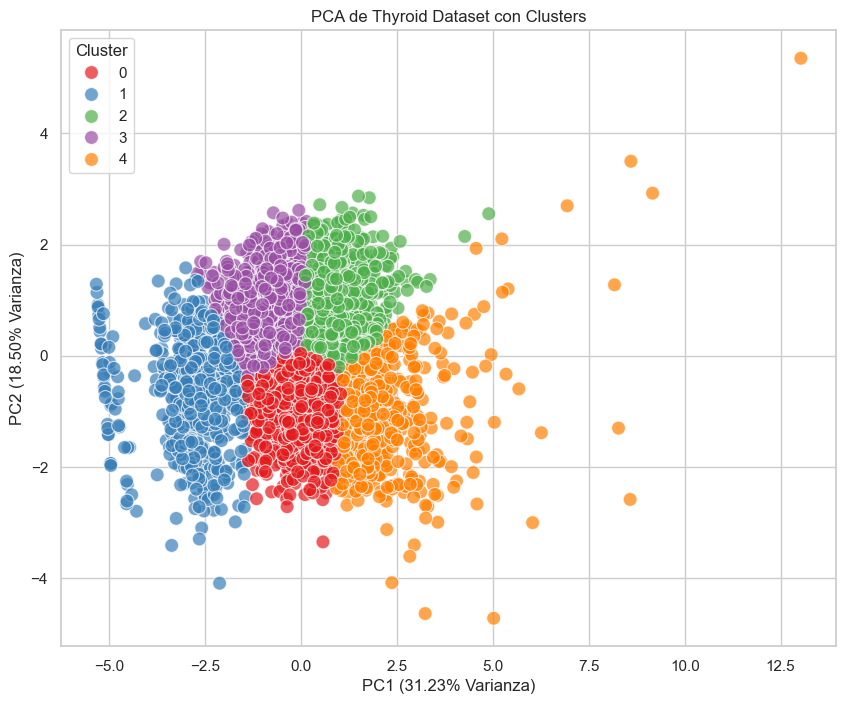

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Configuración de estilos para visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Seleccionar columnas numéricas
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nColumnas numéricas:", numerical_cols)

# Identificar variables binarias y continuas
binary_cols = []
continuous_cols = []

for col in numerical_cols:
    unique_values = df[col].dropna().unique()
    if sorted(unique_values) == [0, 1]:
        binary_cols.append(col)
    else:
        continuous_cols.append(col)

# Excluir 'patient_id' si está presente
if 'patient_id' in continuous_cols:
    continuous_cols.remove('patient_id')
    print("\n'patient_id' excluida de las variables continuas.")

print("\nVariables continuas seleccionadas para PCA:", continuous_cols)

# Seleccionar solo variables numéricas continuas
df_continuous = df[continuous_cols]

# Manejo de valores faltantes
df_cleaned = df_continuous.dropna()

# 🔍 Verificar si df_cleaned está vacío antes de continuar
if df_cleaned.empty:
    raise ValueError("❌ Error: No hay suficientes datos después de eliminar valores faltantes. Prueba imputar valores en lugar de eliminarlos.")

# Estandarizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)


df_scaled = pd.DataFrame(X_scaled, columns=continuous_cols)
print("\nDatos estandarizados:")
print(df_scaled.head())

# Aplicar PCA
n_components = 2  # Puedes ajustar este número según necesidades
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])
# Obtener todos los puntos del PCA
pca_points = pca_df.values.tolist()

# Varianza explicada
varianza_explicada = pca.explained_variance_ratio_
for i, var in enumerate(varianza_explicada, start=1):
    print(f"PC{i}: {var*100:.2f}%")

# Visualización: Scatter Plot
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100, alpha=0.7)
plt.title('PCA de Thyroid Dataset (Variables Numéricas Continuas)')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.show()

# Visualización: Biplot
cargas = pca.components_.T
escalamiento = 3  # Ajusta este valor según los datos
cargas_scaled = cargas * escalamiento

plt.figure(figsize=(12,10))

for i, var in enumerate(continuous_cols):
    plt.arrow(0, 0, cargas_scaled[i,0], cargas_scaled[i,1], 
              color='r', alpha=0.5, head_width=0.05)
    plt.text(cargas_scaled[i,0]*1.1, cargas_scaled[i,1]*1.1, 
             var, color='r', ha='center', va='center')

plt.title('PCA con Vectores de Variables Originales')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.show()

# 📌 **Definir cargas_df antes de los gráficos**
cargas_df = pd.DataFrame(cargas, index=continuous_cols, columns=['PC1', 'PC2'])
print("\nCargas de las variables en las componentes principales:")
print(cargas_df)

# 📊 **Gráfico de Cargas para PC1**
plt.figure(figsize=(10,8))
plt.barh(cargas_df.index, cargas_df['PC1'], color='skyblue')
plt.xlabel('Cargas en PC1')
plt.title('Cargas de las Variables en PC1')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

# 📊 **Gráfico de Cargas para PC2**
plt.figure(figsize=(10,8))
plt.barh(cargas_df.index, cargas_df['PC2'], color='lightgreen')
plt.xlabel('Cargas en PC2')
plt.title('Cargas de las Variables en PC2')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

# 📊 **Clustering con K-Means sobre PCA**
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# Añadir clusters al DataFrame
pca_df['Cluster'] = clusters

# 📊 **Visualizar PCA con Clusters**
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.7)
plt.title('PCA de Thyroid Dataset con Clusters')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.show()


Análisis de las Componentes Principales
PC1 explica el 31.23% de la varianza total del dataset.
PC2 explica el 18.50% de la varianza adicional.
Juntas explican el 49.73% de la varianza, lo que indica que estas dos dimensiones capturan casi la mitad de la información del conjunto de datos.

----------------------------------------------------------

Las cargas indican cuánto influye cada variable en una componente principal.

📌 PC1 (31.23% de la varianza)
TT4 (0.627), FTI (0.567) y T4U (0.472) tienen cargas altas y positivas → Esta componente está dominada por mediciones hormonales de la tiroides.
T3 (0.225) también contribuye, pero menos que TT4 y FTI.
Edad (-0.082) tiene un impacto leve y negativo.
🔹 Interpretación: PC1 parece representar el estado hormonal tiroideo.

📌 PC2 (18.50% de la varianza)
Edad (0.711) tiene una carga muy fuerte en esta componente → Indica que la edad es una variable clave en PC2.
T3 (-0.621) tiene una carga negativa significativa.
Otras hormonas (TT4, FTI, T4U, TBG) tienen cargas menores.
🔹 Interpretación: PC2 parece representar una relación entre la edad y los niveles de T3.

----------------------------------------------------------

PC1 representa principalmente la función tiroidea, con TT4 y FTI dominando.
PC2 está más influenciada por la edad y su relación con T3.
Las primeras dos componentes explican el 49.73% de la varianza, por lo que más dimensiones pueden ser necesarias para capturar toda la variabilidad del dataset.

## PCA con variables binarias


Variables continuas seleccionadas para PCA: ['age', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
Variables binarias detectadas: ['on_1hyroxine', 'query_on_1hyroxine', 'on_an1i1hyroid_meds', 'sick', 'pregnan1', '1hyroid_surgery', 'I131_1rea1men1', 'query_hypo1hyroid', 'query_hyper1hyroid', 'li1hium', 'goi1re', '1umor', 'hypopi1ui1ary', 'psych', 'target_thyro']
PC1: 28.68% de la varianza explicada
PC2: 16.93% de la varianza explicada


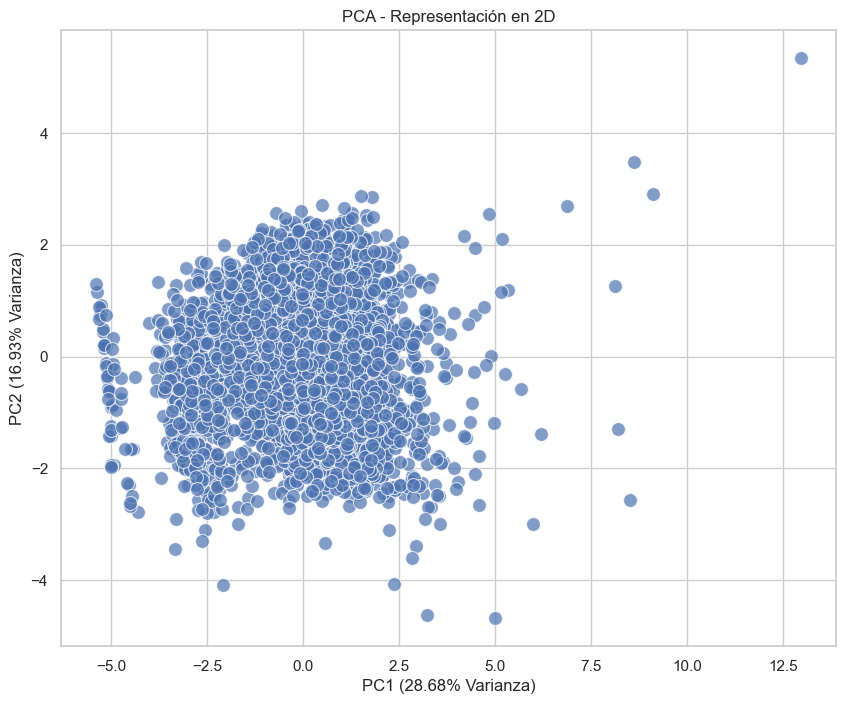

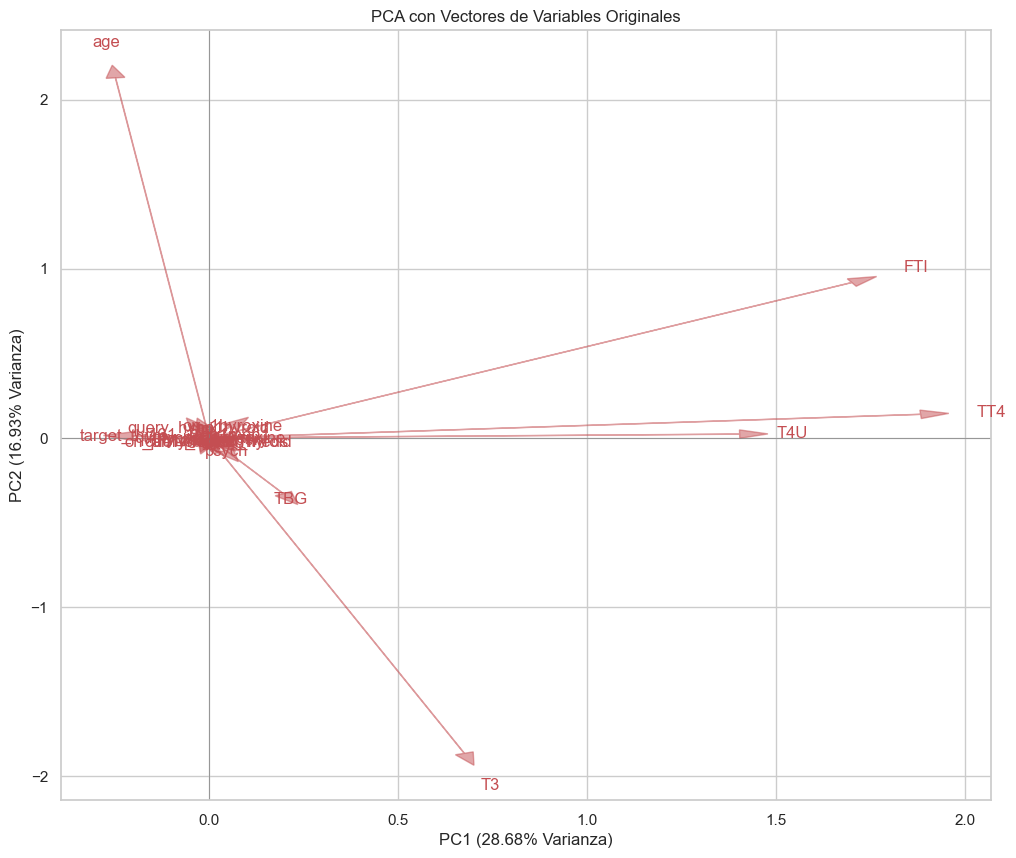


Cargas de las variables en las componentes principales:
                          PC1       PC2
age                 -0.082613  0.709655
T3                   0.224912 -0.621624
TT4                  0.627173  0.046492
T4U                  0.467634  0.007506
FTI                  0.566469  0.306209
TBG                  0.065291 -0.109820
on_1hyroxine         0.018413  0.021617
query_on_1hyroxine   0.000235  0.000049
on_an1i1hyroid_meds -0.001775 -0.007418
sick                -0.004056  0.014980
pregnan1             0.008152 -0.007836
1hyroid_surgery     -0.001057 -0.003879
I131_1rea1men1      -0.001528  0.004481
query_hypo1hyroid   -0.008782  0.017149
query_hyper1hyroid   0.006845 -0.007598
li1hium              0.000396 -0.003928
goi1re               0.001341 -0.004954
1umor                0.001383 -0.008167
hypopi1ui1ary        0.000000  0.000000
psych                0.013679 -0.024837
target_thyro        -0.068330  0.003523


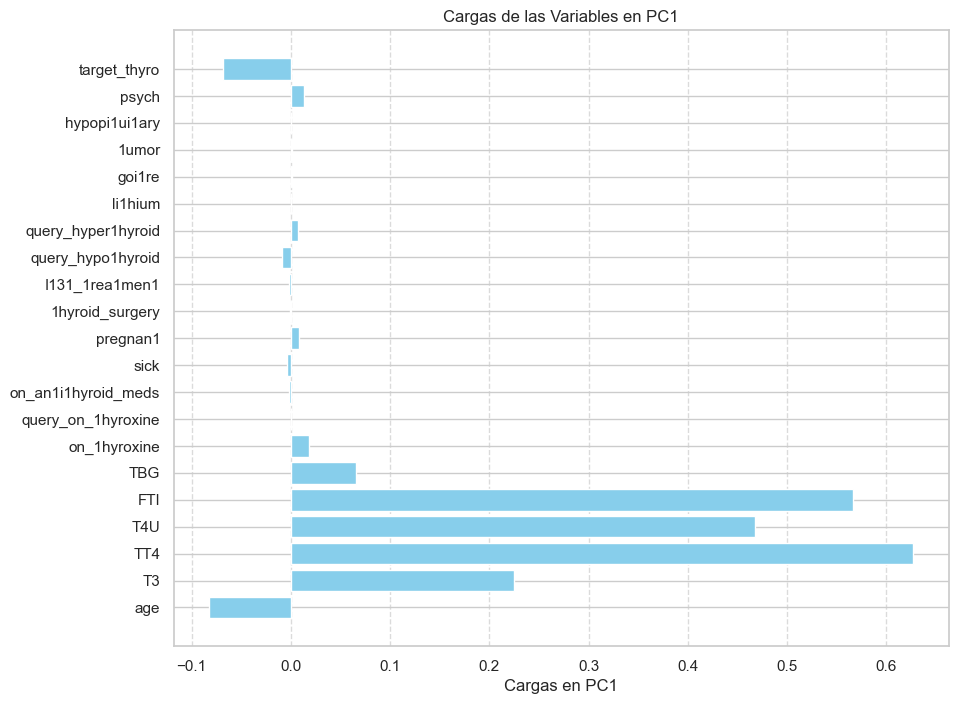

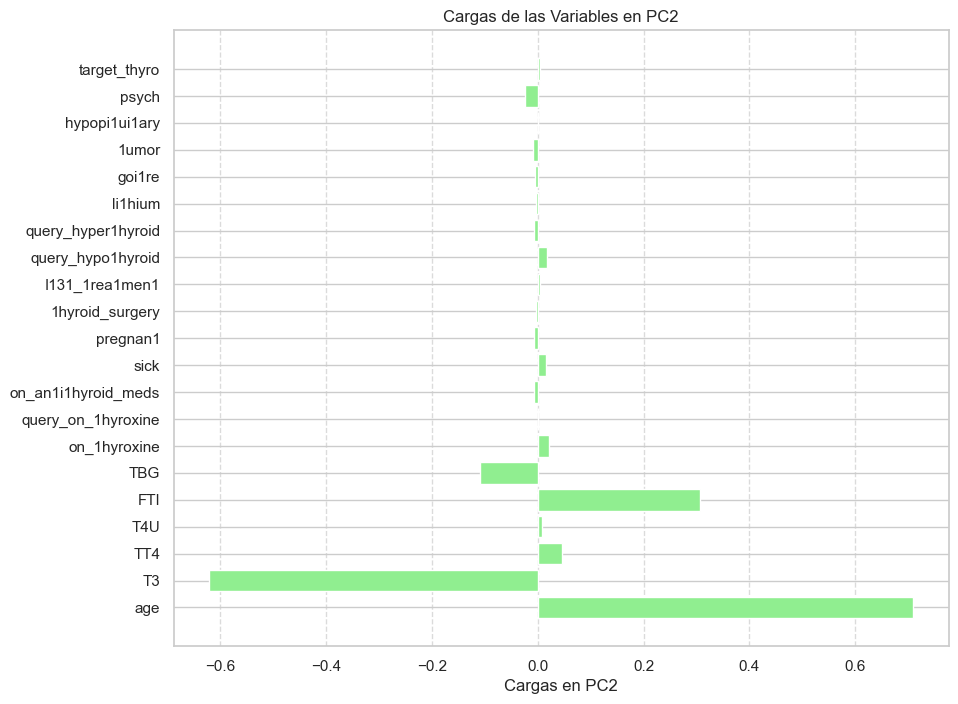

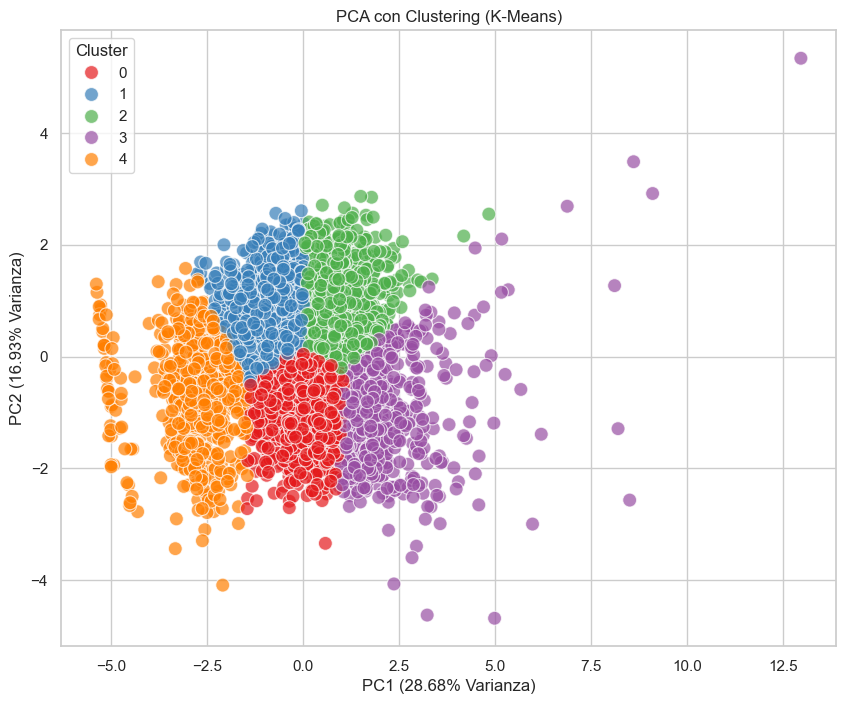

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans

# Configuración de estilos para visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Cargar datos (Asegúrate de definir df antes de ejecutar)
# df = pd.read_csv("tu_archivo.csv") # Descomenta si necesitas cargar datos

# Seleccionar columnas numéricas
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Identificar variables binarias y continuas
binary_cols = []
continuous_cols = []

for col in numerical_cols:
    unique_values = df[col].dropna().unique()
    if set(unique_values).issubset({0, 1}):
        binary_cols.append(col)
    else:
        continuous_cols.append(col)

# Excluir identificadores si es necesario
id_cols = ['patient_id']
continuous_cols = [col for col in continuous_cols if col not in id_cols]

print(f"\nVariables continuas seleccionadas para PCA: {continuous_cols}")
print(f"Variables binarias detectadas: {binary_cols}")

# Preparación de datos
df_continuous = df[continuous_cols].dropna()

# Estandarizar variables continuas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_continuous)

# Convertir variables binarias sin cambiar su escala
df_binary = df[binary_cols].astype(float) if binary_cols else None

# Concatenar datos escalados
if df_binary is not None:
    X_final = np.hstack((X_scaled, df_binary.values))
    feature_names = continuous_cols + binary_cols
else:
    X_final = X_scaled
    feature_names = continuous_cols

# Aplicar PCA
n_components = 2  # Ajusta este número según necesidades
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_final)

# Crear DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Obtener varianza explicada
varianza_explicada = pca.explained_variance_ratio_

# Mostrar varianza explicada
for i, var in enumerate(varianza_explicada, start=1):
    print(f"PC{i}: {var*100:.2f}% de la varianza explicada")

# Visualización: Scatter Plot de PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100, alpha=0.7)
plt.title('PCA - Representación en 2D')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.show()

# Visualización: Biplot
cargas = pca.components_.T
escalamiento = 3  # Ajusta este valor según los datos
cargas_scaled = cargas * escalamiento

plt.figure(figsize=(12, 10))
for i, var in enumerate(feature_names):
    plt.arrow(0, 0, cargas_scaled[i, 0], cargas_scaled[i, 1], 
              color='r', alpha=0.5, head_width=0.05)
    plt.text(cargas_scaled[i, 0]*1.1, cargas_scaled[i, 1]*1.1, 
             var, color='r', ha='center', va='center')

plt.title('PCA con Vectores de Variables Originales')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.show()

# DataFrame de Cargas
cargas_df = pd.DataFrame(cargas, index=feature_names, columns=['PC1', 'PC2'])
print("\nCargas de las variables en las componentes principales:")
print(cargas_df)

# Visualización: Cargas en PC1 y PC2
for pc in ['PC1', 'PC2']:
    plt.figure(figsize=(10, 8))
    plt.barh(cargas_df.index, cargas_df[pc], color='skyblue' if pc == 'PC1' else 'lightgreen')
    plt.xlabel(f'Cargas en {pc}')
    plt.title(f'Cargas de las Variables en {pc}')
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.show()

# Agrupamiento con K-Means
num_clusters = 5  # Ajusta según los datos
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# Añadir clusters al DataFrame
pca_df['Cluster'] = clusters

# Visualización: PCA con Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.7)
plt.title('PCA con Clustering (K-Means)')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.show()



## TSNE


Columnas numéricas: ['age', 'on_1hyroxine', 'query_on_1hyroxine', 'on_an1i1hyroid_meds', 'sick', 'pregnan1', '1hyroid_surgery', 'I131_1rea1men1', 'query_hypo1hyroid', 'query_hyper1hyroid', 'li1hium', 'goi1re', '1umor', 'hypopi1ui1ary', 'psych', 'target_thyro', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'patient_id']

'patient_id' excluida de las variables continuas.

Variables continuas seleccionadas para t-SNE: ['age', 'hypopi1ui1ary', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

Número de filas después de eliminar valores faltantes: 6210

Datos estandarizados:
        age  hypopi1ui1ary        T3       TT4       T4U       FTI       TBG
0 -1.246131            0.0  0.499894  0.841120 -3.180013 -2.457592 -0.061952
1 -1.298241            0.0  1.193645  0.467430 -3.180013 -2.457592 -0.061952
2 -1.298241            0.0  0.400787 -0.778203 -3.180013 -2.457592 -0.061952
3 -1.298241            0.0  0.301680 -0.560217 -3.180013 -2.457592 -0.061952
4  0.056598            0.0  0.896323  0.996824 -3.180013 -2.4575

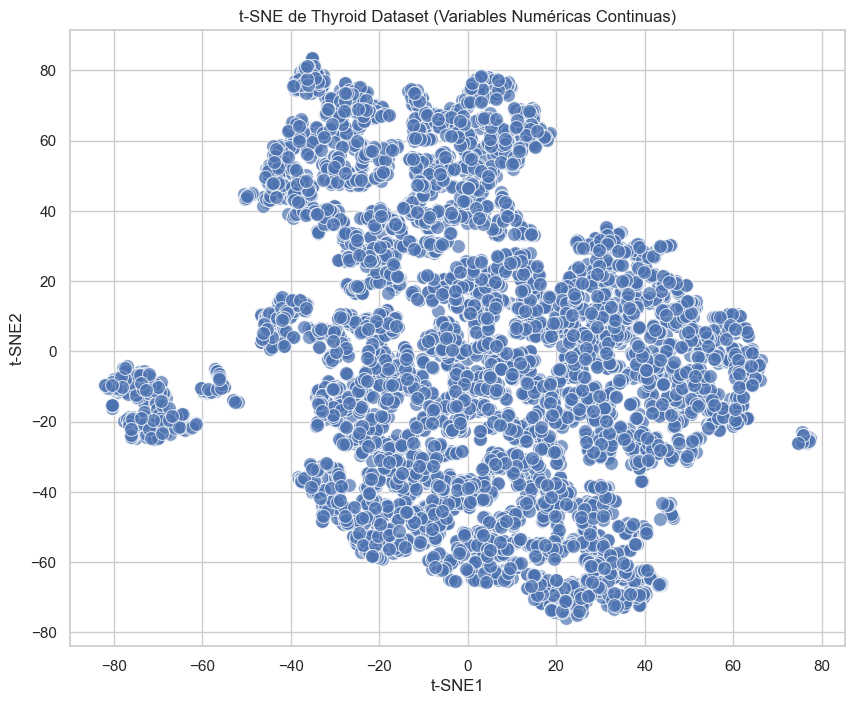

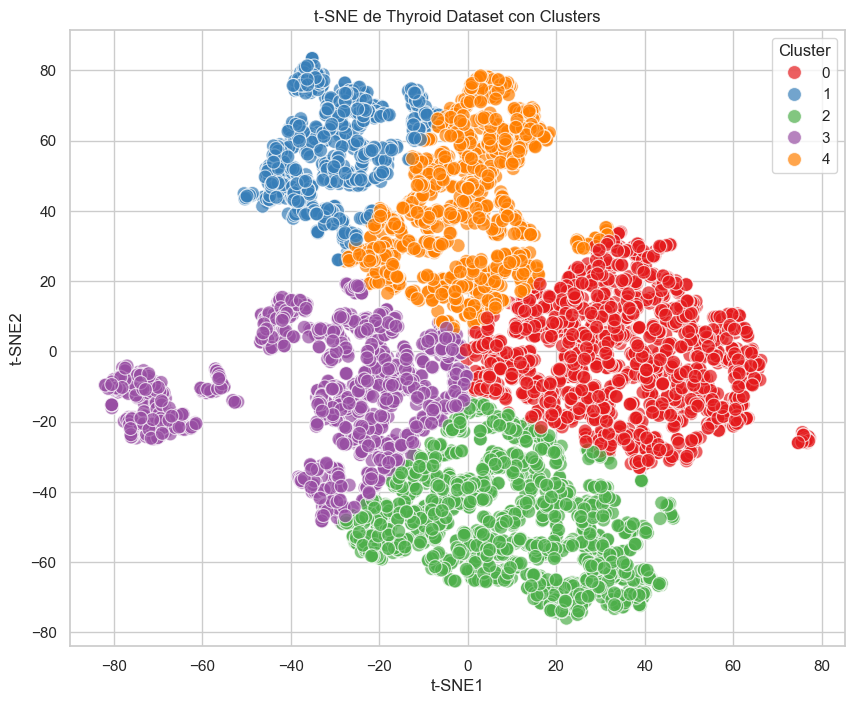

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Configuración de estilos para visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Seleccionar columnas numéricas
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nColumnas numéricas:", numerical_cols)

# Identificar variables binarias y continuas
binary_cols = []
continuous_cols = []

for col in numerical_cols:
    unique_values = df[col].dropna().unique()
    if sorted(unique_values) == [0, 1]:
        binary_cols.append(col)
    else:
        continuous_cols.append(col)

# Excluir 'patient_id' si está presente
if 'patient_id' in continuous_cols:
    continuous_cols.remove('patient_id')
    print("\n'patient_id' excluida de las variables continuas.")

print("\nVariables continuas seleccionadas para t-SNE:", continuous_cols)

# Seleccionar solo variables numéricas continuas
df_continuous = df[continuous_cols]

# Manejo de valores faltantes
df_cleaned = df_continuous.dropna()
print(f"\nNúmero de filas después de eliminar valores faltantes: {df_cleaned.shape[0]}")

# Estandarizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)

df_scaled = pd.DataFrame(X_scaled, columns=continuous_cols)
print("\nDatos estandarizados:")
print(df_scaled.head())

# Aplicar t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_components = tsne.fit_transform(X_scaled)
tsne_df = pd.DataFrame(data=tsne_components, columns=['t-SNE1', 't-SNE2'])

# Obtener todos los puntos del t-SNE
tsne_points = tsne_df.values.tolist()

# Visualización: Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=tsne_df, s=100, alpha=0.7)
plt.title('t-SNE de Thyroid Dataset (Variables Numéricas Continuas)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.grid(True)
plt.show()

# Aplicar KMeans para clustering en t-SNE
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(tsne_df[['t-SNE1', 't-SNE2']])

# Añadir clusters al DataFrame
tsne_df['Cluster'] = clusters

# Visualización de Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Cluster', data=tsne_df, palette='Set1', s=100, alpha=0.7)
plt.title('t-SNE de Thyroid Dataset con Clusters')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.grid(True)
plt.show()


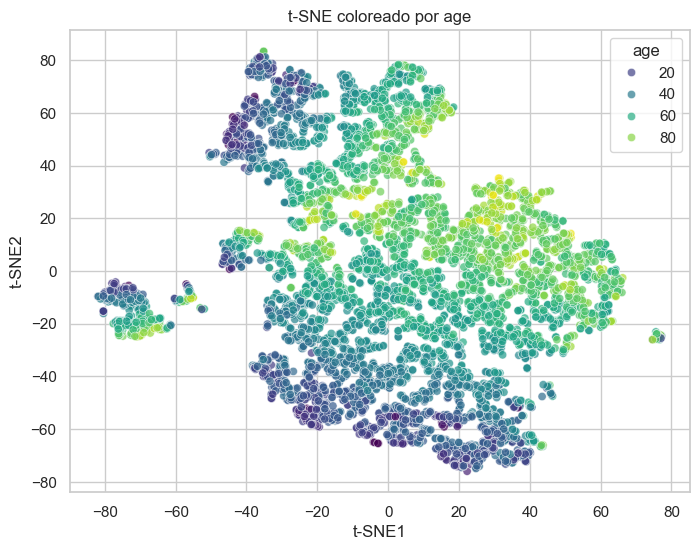

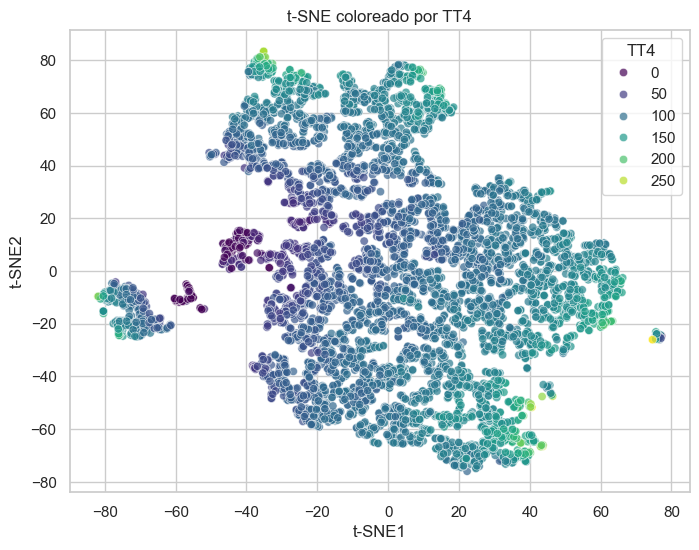

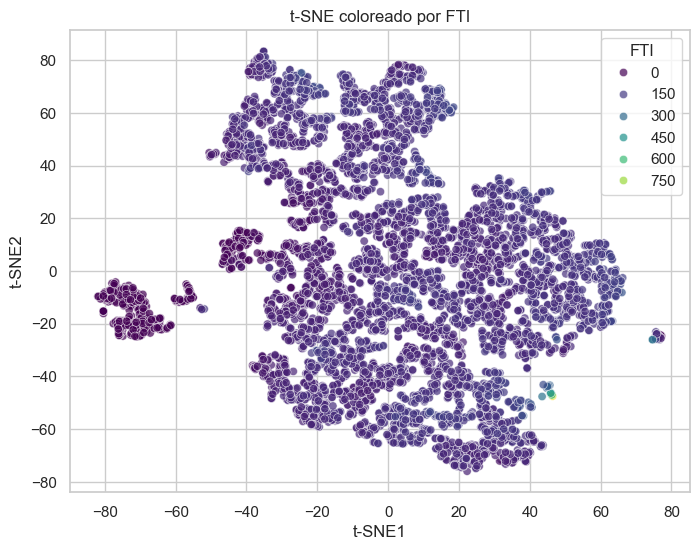

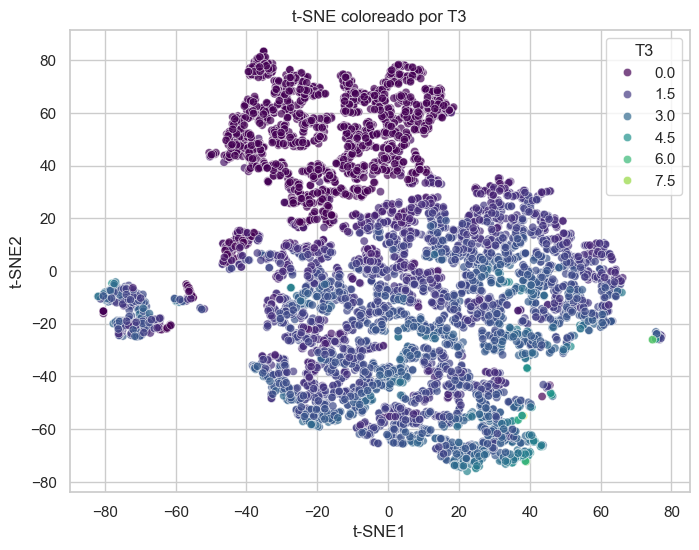

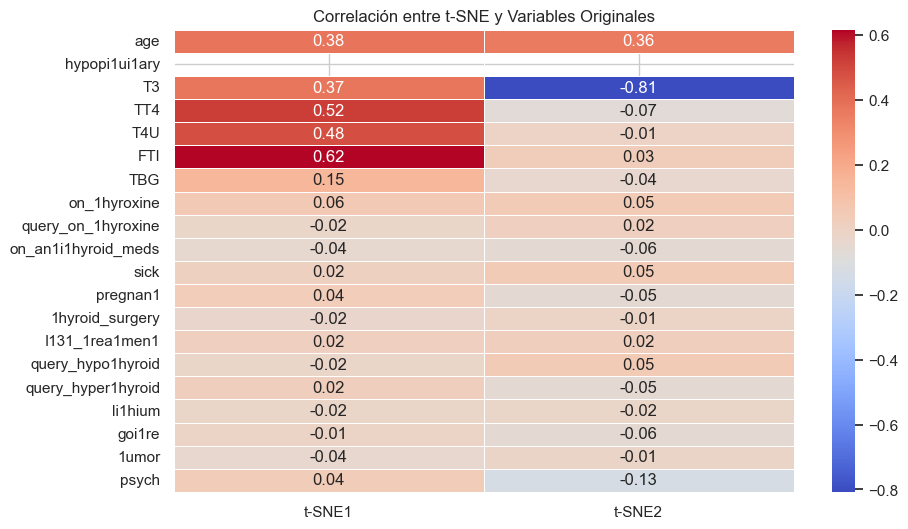

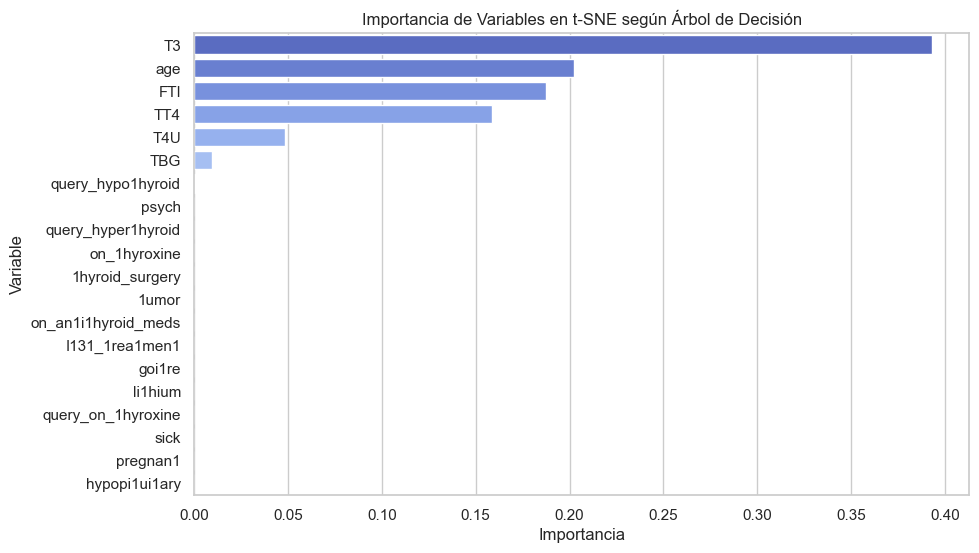

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor


# ======= 1️ Visualización por Variable ======= #
variables_a_visualizar = ['age', 'TT4', 'FTI', 'T3']  # Seleccionar algunas variables clave

for var in variables_a_visualizar:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=tsne_df['t-SNE1'], y=tsne_df['t-SNE2'], hue=df[var], palette='viridis', alpha=0.7)
    plt.title(f't-SNE coloreado por {var}')
    plt.show()

# ======= 2️ Correlación entre t-SNE y Variables Originales ======= #
df_tsne_corr = pd.concat([tsne_df, df[continuous_cols + binary_cols]], axis=1)

# Calcular correlación
correlaciones = df_tsne_corr.corr().loc[continuous_cols + binary_cols, ['t-SNE1', 't-SNE2']]

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlación entre t-SNE y Variables Originales')
plt.show()

# ======= 3 Feature Importance con Árbol de Decisión ======= #
X = df[continuous_cols + binary_cols]  # Variables originales
y_tsne1, y_tsne2 = tsne_df['t-SNE1'], tsne_df['t-SNE2']

# Entrenar árboles de decisión para predecir t-SNE1 y t-SNE2
model1 = DecisionTreeRegressor().fit(X, y_tsne1)
model2 = DecisionTreeRegressor().fit(X, y_tsne2)

# Obtener importancia de las variables
feature_importance = (model1.feature_importances_ + model2.feature_importances_) / 2
importancia_df = pd.DataFrame({'Variable': X.columns, 'Importancia': feature_importance})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(data=importancia_df, x='Importancia', y='Variable', hue='Variable', palette='coolwarm', dodge=False, legend=False)
plt.title('Importancia de Variables en t-SNE según Árbol de Decisión')
plt.show()





## Embedding

c:\Users\jvelareb\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


PC1: 29.83%
PC2: 17.99%


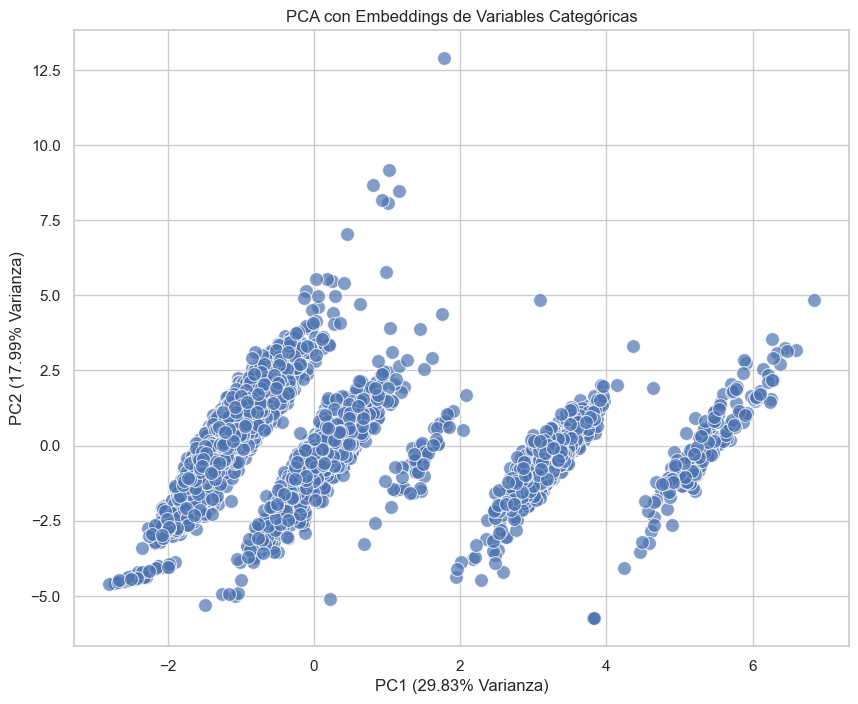

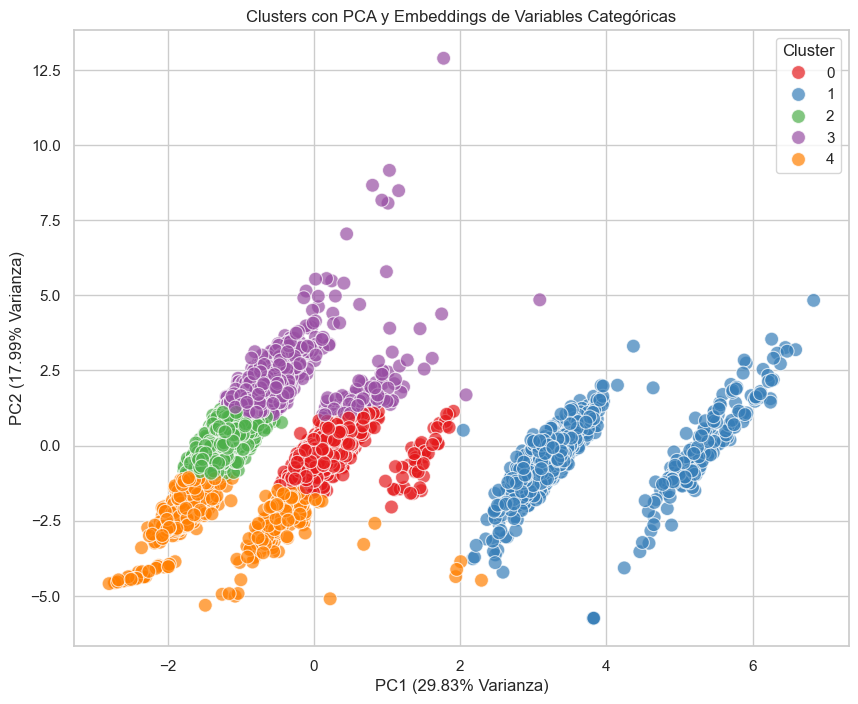

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Configuración de visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Cargar el dataset (suponiendo que df ya está disponible)
#df = pd.read_csv('thyroid_dataset.csv')

# Identificar columnas numéricas y categóricas
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Identificar variables binarias y continuas
binary_cols = []
continuous_cols = []

for col in numerical_cols:
    unique_values = df[col].dropna().unique()
    if sorted(unique_values) == [0, 1]:
        binary_cols.append(col)
    else:
        continuous_cols.append(col)

# Excluir 'patient_id' si está presente
if 'patient_id' in continuous_cols:
    continuous_cols.remove('patient_id')

# Preprocesamiento de variables categóricas con Embeddings
embedding_dim = 4  # Tamaño del embedding
categorical_embeddings = {}
encoded_dfs = []

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convertir categorías a números
    vocab_size = len(le.classes_)  # Número de categorías únicas
    
    # Crear embeddings con una red neuronal simple
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=1),
        Flatten(),
        Dense(embedding_dim, activation='relu')
    ])
    
    model.compile(optimizer=Adam(), loss='mse')
    
    X_train, X_test = train_test_split(df[col], test_size=0.2, random_state=42)
    model.fit(X_train, X_train, epochs=10, batch_size=16, verbose=0)
    
    # Obtener los embeddings
    embeddings = model.layers[0].get_weights()[0]
    
    # Convertir a DataFrame
    emb_df = pd.DataFrame(embeddings, columns=[f'{col}_emb_{i}' for i in range(embedding_dim)])
    emb_df[col] = range(vocab_size)
    categorical_embeddings[col] = emb_df
    
    # Agregar al dataframe
    df = df.merge(emb_df, on=col, how='left')
    encoded_dfs.append(emb_df)

# Eliminar las columnas categóricas originales
df.drop(columns=categorical_cols, inplace=True)

# Seleccionar variables continuas y embeddings para PCA
df_pca = df[continuous_cols + [f'{col}_emb_{i}' for col in categorical_embeddings for i in range(embedding_dim)]]

# Manejo de valores faltantes
df_cleaned = df_pca.dropna()

# Estandarizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)

# Aplicar PCA
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])

# Varianza explicada
varianza_explicada = pca.explained_variance_ratio_
for i, var in enumerate(varianza_explicada, start=1):
    print(f"PC{i}: {var*100:.2f}%")

# Visualización: Scatter Plot
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100, alpha=0.7)
plt.title('PCA con Embeddings de Variables Categóricas')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.show()

# Aplicar K-Means para clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_df[['PC1', 'PC2']])
pca_df['Cluster'] = clusters

# Visualizar Clusters
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.7)
plt.title('Clusters con PCA y Embeddings de Variables Categóricas')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.show()


## LDA

⚠️ Convirtiendo variables categóricas a numéricas: ['referral_source']


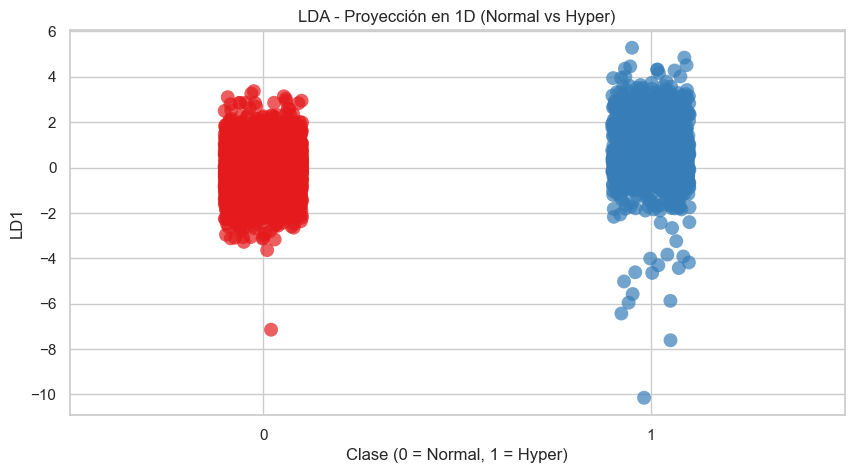


 Cargas de las variables en LD1:
                                LD1
T4U                    3.449888e-01
on_1hyroxine           2.906039e-01
query_hypo1hyroid      2.251996e-01
query_on_1hyroxine     8.381272e-02
1hyroid_surgery        8.254576e-02
on_an1i1hyroid_meds    6.219280e-02
age                    5.473066e-02
referral_source_other  5.081547e-02
TBG                    3.816659e-02
query_hyper1hyroid     3.411547e-02
I131_1rea1men1         2.669245e-02
li1hium                1.560532e-02
patient_id             1.558333e-02
referral_source_SVHD   3.070336e-04
hypopi1ui1ary         -6.095543e-17
referral_source_SVI   -2.154674e-02
psych                 -2.676610e-02
pregnan1              -3.174541e-02
1umor                 -3.188674e-02
T3                    -4.939664e-02
sick                  -6.828099e-02
goi1re                -1.082460e-01
referral_source_SVHC  -1.922131e-01
FTI                   -2.670017e-01
TT4                   -6.376845e-01


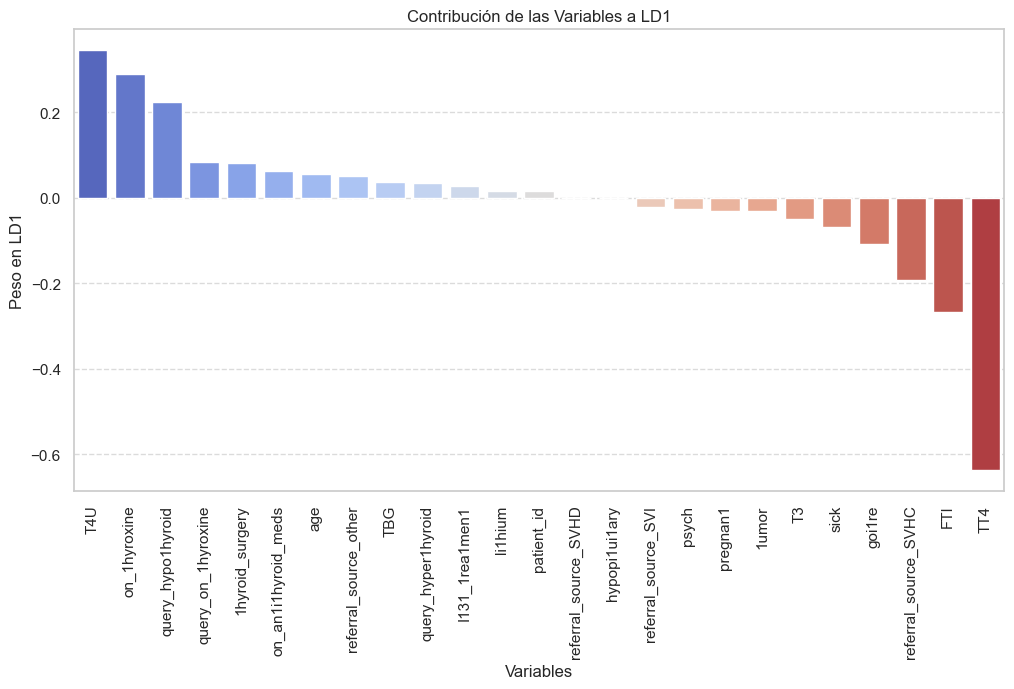


🔹 Varianza explicada por LD1: 100.00%

📊 Autovectores de LDA:
                       Autovector_LD1
age                      6.195697e-02
on_1hyroxine             3.289735e-01
query_on_1hyroxine       9.487886e-02
on_an1i1hyroid_meds      7.040438e-02
sick                    -7.729642e-02
pregnan1                -3.593689e-02
1hyroid_surgery          9.344463e-02
I131_1rea1men1           3.021677e-02
query_hypo1hyroid        2.549337e-01
query_hyper1hyroid       3.861987e-02
li1hium                  1.766575e-02
goi1re                  -1.225382e-01
1umor                   -3.609688e-02
hypopi1ui1ary           -6.900363e-17
psych                   -3.030014e-02
T3                      -5.591868e-02
TT4                     -7.218806e-01
T4U                      3.905391e-01
FTI                     -3.022551e-01
TBG                      4.320588e-02
patient_id               1.764086e-02
referral_source_SVHC    -2.175918e-01
referral_source_SVHD     3.475726e-04
referral_source_SVI     -

C:\Users\jvelareb\AppData\Local\Temp\ipykernel_23700\2426486676.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=autovectores_df.index, y=autovectores_df['Autovector_LD1'], palette='viridis')


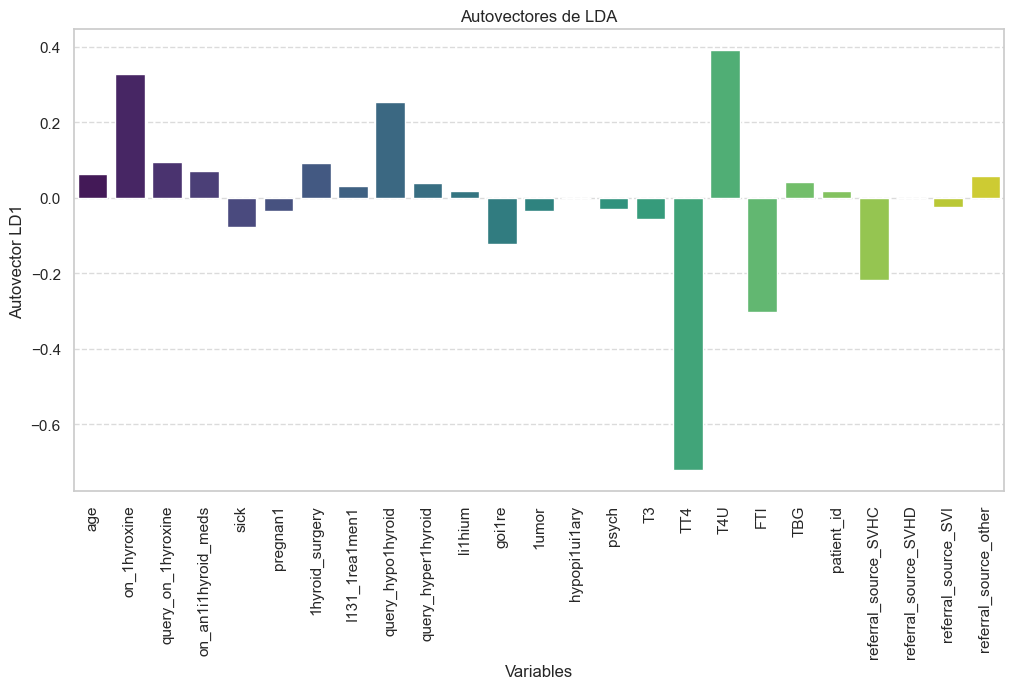

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Configuración de estilos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# Verificar que target es binario y convertir si es necesario
if df[target_column].dtype == 'object' or df[target_column].dtype.name == 'category':
    print("⚠️ Convirtiendo target a binario (0 = Normal, 1 = Hyper)...")
    df[target_column] = df[target_column].map({'normal': 0, 'hyper': 1})

# Asegurar que target solo tiene 0 y 1
assert set(df[target_column].dropna().unique()) == {0, 1}, "❌ Target debe ser solo 0 y 1."

# Separar variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Convertir variables categóricas a numéricas con OneHotEncoder
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

if categorical_cols:
    print(f"⚠️ Convirtiendo variables categóricas a numéricas: {categorical_cols}")
    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    X_encoded = encoder.fit_transform(X[categorical_cols])
    
    # Crear DataFrame con las columnas codificadas
    X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X.index)
    
    # Eliminar las columnas categóricas originales y agregar las codificadas
    X = X.drop(columns=categorical_cols)
    X = pd.concat([X, X_encoded_df], axis=1)

# Verificar si quedan valores no numéricos
assert X.select_dtypes(exclude=[np.number]).empty, "❌ Aún quedan valores no numéricos en X."

# Normalizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar LDA (solo 1 componente para binario)
lda = LinearDiscriminantAnalysis(n_components=1)
lda_components = lda.fit_transform(X_scaled, y)

# Crear DataFrame con la proyección
lda_df = pd.DataFrame(data=lda_components, columns=['LD1'])
lda_df['Clase'] = y

# Visualización en 1D con seaborn
plt.figure(figsize=(10, 5))
sns.stripplot(x='Clase', y='LD1', data=lda_df, hue='Clase', palette='Set1', jitter=True, size=10, alpha=0.7, legend=False)
plt.title('LDA - Proyección en 1D (Normal vs Hyper)')
plt.xlabel('Clase (0 = Normal, 1 = Hyper)')
plt.ylabel('LD1')
plt.grid(True)
plt.show()

#**2. Coeficientes de LDA (Cargas de las variables)**
coeficientes = pd.DataFrame(lda.coef_.T, index=X.columns, columns=['LD1'])
coeficientes = coeficientes.sort_values(by='LD1', ascending=False)


print("\n Cargas de las variables en LD1:")
print(coeficientes)

# **3. Gráfico de las contribuciones de las variables**
plt.figure(figsize=(12, 6))
sns.barplot(x=coeficientes.index, y=coeficientes['LD1'], hue=coeficientes.index, palette='coolwarm', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Peso en LD1')
plt.title('Contribución de las Variables a LD1')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


#  **4. Varianza explicada (Información retenida en LD1)**
varianza_explicada = lda.explained_variance_ratio_
print(f"\n🔹 Varianza explicada por LD1: {varianza_explicada[0] * 100:.2f}%")

# 📌 **5. Obtención de los Autovectores (Eigenvectors)**
autovectores = lda.scalings_
autovectores_df = pd.DataFrame(autovectores, index=X.columns, columns=['Autovector_LD1'])

print("\n📊 Autovectores de LDA:")
print(autovectores_df)

# 📊 **6. Gráfico de los autovectores**
plt.figure(figsize=(12, 6))
sns.barplot(x=autovectores_df.index, y=autovectores_df['Autovector_LD1'], palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Autovector LD1')
plt.title('Autovectores de LDA')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()



Cómo interpretar los resultados de LDA
Los coeficientes de LDA (LD1) indican qué variables son más importantes para separar las clases (normal vs hyper). Aquí está el análisis en detalle:

¿Qué significan los valores de LD1?
Cada valor en la columna LD1 indica cuánto contribuye esa variable a la separación entre las clases 0 = normal y 1 = hyper:

Valores positivos altos → Variables que empujan hacia la clase "hyper" (1).
Valores negativos altos → Variables que empujan hacia la clase "normal" (0).
Valores cercanos a 0 → Variables con poca influencia en la separación.
Variables más importantes para distinguir entre "normal" y "hyper"
Las variables con los valores absolutos más altos en LD1 son las que más influyen en la separación de las clases.

Variables que indican "hyper" (1)
Estas variables tienen LD1 positivo alto, por lo que aumentan la probabilidad de estar en la clase "hyper":

Variable	LD1
TT4	0.637
FTI	0.267
referral_source_SVHC	0.192
goi1re	0.108
sick	0.068
Conclusión: Si una persona tiene valores altos en TT4, FTI o ha sido referida desde SVHC, es más probable que sea clasificada como "hyper".

Variables que indican "normal" (0)
Estas variables tienen LD1 negativo alto, lo que significa que disminuyen la probabilidad de ser "hyper" y aumentan la probabilidad de ser "normal"**:

Variable	LD1
T4U	-0.344
on_1hyroxine	-0.291
query_hypo1hyroid	-0.225
query_on_1hyroxine	-0.083
1hyroid_surgery	-0.082
Conclusión: Valores altos de T4U o estar en on_thyroxine disminuyen la probabilidad de ser "hyper" y aumentan la de ser "normal".

¿Qué hacer con esta información?
Confirmar con expertos en el dominio si estas variables son relevantes para la clasificación entre hipertiroidismo y normalidad.
Validar con más datos o modelos si estas variables siguen siendo significativas.
Mejorar el modelo quitando variables que tienen valores cercanos a 0 (poca influencia) para evitar ruido en el modelo.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Aplicar LDA con hiperparámetros personalizados
lda = LinearDiscriminantAnalysis(
    solver='lsqr',          # Algoritmo de cálculo ('svd', 'lsqr', 'eigen')
    shrinkage='auto',       # Regularización automática
    priors=None,            # Estimación automática de probabilidades de clase
    n_components=1,         # Reducir a 1 dimensión (obligatorio para binario)
    store_covariance=True,  # Guardar matriz de covarianza
    tol=1e-4                # Tolerancia para convergencia
)

# Entrenar LDA y transformar datos
lda_components = lda.fit_transform(X_scaled, y)

# Ver hiperparámetros usados en el modelo
print("📌 Hiperparámetros del modelo:")
print(lda.get_params())


## Clustering Jerárquico


Columnas numéricas: ['age', 'on_1hyroxine', 'query_on_1hyroxine', 'on_an1i1hyroid_meds', 'sick', 'pregnan1', '1hyroid_surgery', 'I131_1rea1men1', 'query_hypo1hyroid', 'query_hyper1hyroid', 'li1hium', 'goi1re', '1umor', 'hypopi1ui1ary', 'psych', 'target_thyro', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'patient_id', 'referral_source_emb_0', 'referral_source_emb_1', 'referral_source_emb_2', 'referral_source_emb_3']

Variables continuas seleccionadas para Clustering Jerárquico: ['age', 'hypopi1ui1ary', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'referral_source_emb_0', 'referral_source_emb_1', 'referral_source_emb_2', 'referral_source_emb_3']
Dimensión de df_cleaned: (6210, 11)
Columnas seleccionadas: ['age', 'hypopi1ui1ary', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'referral_source_emb_0', 'referral_source_emb_1', 'referral_source_emb_2', 'referral_source_emb_3']

Datos estandarizados:
        age  hypopi1ui1ary        T3       TT4       T4U       FTI       TBG  \
0 -1.246131            0.0  0.499894  0.841120

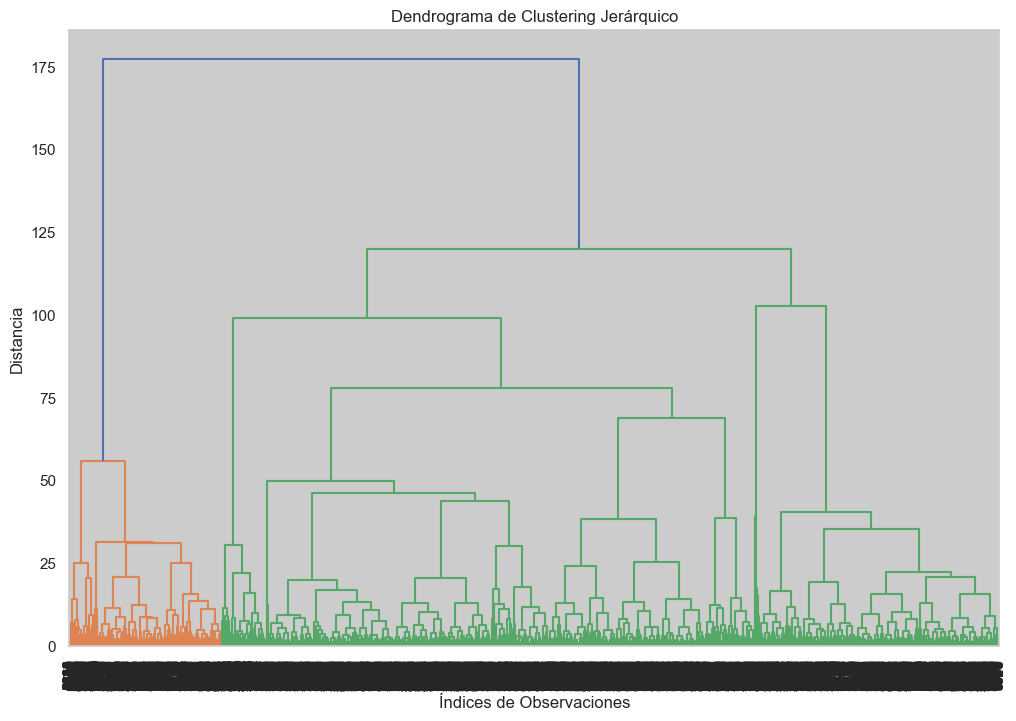

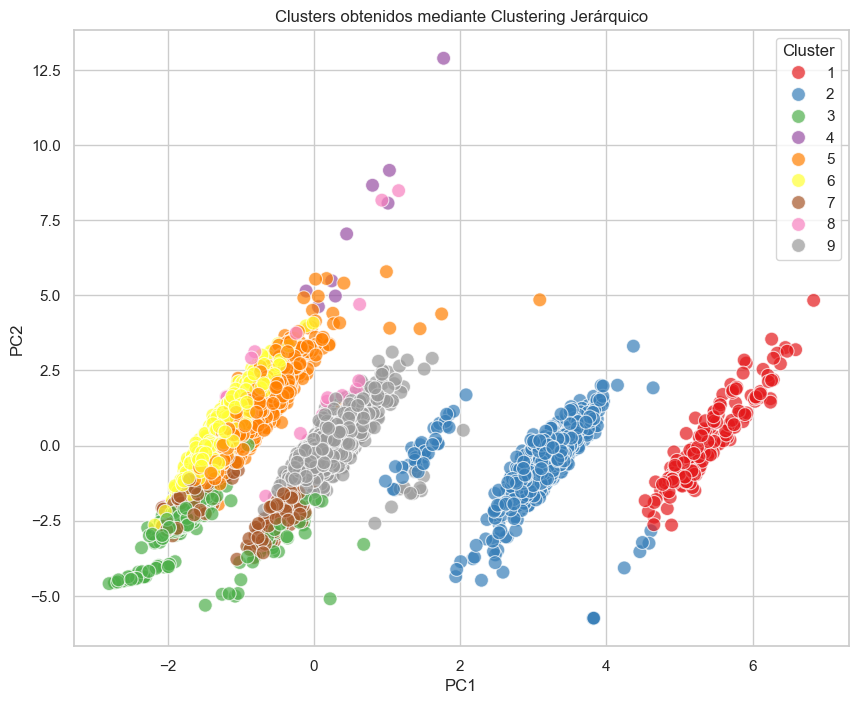

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Configuración de estilos para visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Seleccionar columnas numéricas
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nColumnas numéricas:", numerical_cols)

# Identificar variables binarias y continuas
binary_cols = []
continuous_cols = []

for col in numerical_cols:
    if col != 'patient_id':  # Excluir 'patient_id'
        unique_values = df[col].dropna().unique()
        if sorted(unique_values) == [0, 1]:
            binary_cols.append(col)
        else:
            continuous_cols.append(col)

# Excluir 'patient_id' si está presente
df_continuous = df[continuous_cols]

print("\nVariables continuas seleccionadas para Clustering Jerárquico:", continuous_cols)

# Manejo de valores faltantes
df_cleaned = df_continuous.dropna()

# 🔍 Verificar si df_cleaned está vacío antes de continuar
if df_cleaned.empty:
    raise ValueError("❌ Error: No hay suficientes datos después de eliminar valores faltantes. Prueba imputar valores en lugar de eliminarlos.")

# Estandarizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)

df_scaled = pd.DataFrame(X_scaled, columns=continuous_cols)

print(f"Dimensión de df_cleaned: {df_cleaned.shape}")
print(f"Columnas seleccionadas: {continuous_cols}")
print("\nDatos estandarizados:")
print(df_scaled.head())

# Aplicar Clustering Jerárquico
linkage_matrix = linkage(X_scaled, method='ward')  # Método Ward minimiza la varianza dentro de los clusters

# Visualización del dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=df_cleaned.index, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índices de Observaciones")
plt.ylabel("Distancia")
plt.grid(True)
plt.show()

# Definir número de clusters y asignar etiquetas
distance_threshold = 50  # Ajustar según el dendrograma
clusters = fcluster(linkage_matrix, t=distance_threshold, criterion='distance')

df_cleaned['Cluster'] = clusters

# 📊 **Visualización con Scatter Plot** (Usamos PCA para reducir dimensiones a 2D para visualización)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.7)
plt.title('Clusters obtenidos mediante Clustering Jerárquico')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()